In [1]:
# check if packages can be loaded, i.e. they are already installed
library(dplyr)
library(mdsr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## K-Means in R

2.1

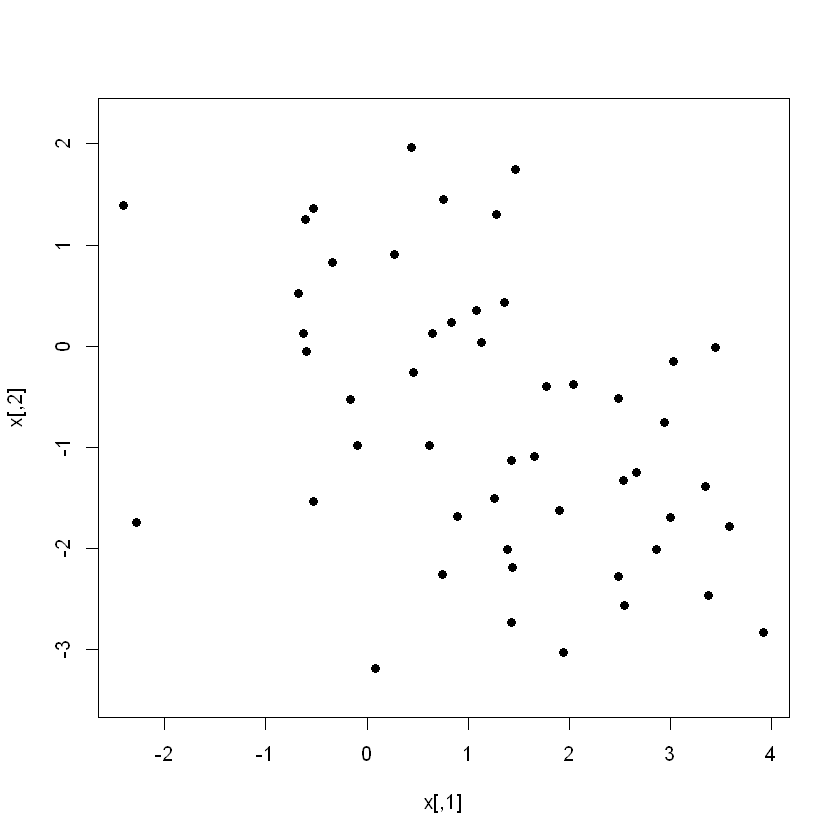

In [7]:
# data generation
set.seed(1234567890)
x <- matrix(rnorm(50*2), ncol=2)
x[1:25,1] <- x[1:25,1] + 2
x[1:25,2] <- x[1:25,2] - 2
plot(x, pch = 16, asp = 1) # why `asp=1`? Check help for `plot()` to find out!

[1] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 1 2 1 1 1 1 1 1 1
[39] 2 1 1 1 1 1 1 1 1 1 1 1

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

[1] 198.8283

[1] 91.91395

[1] 46.91840 44.99555

1,0.06435052,0.3460184
2,2.22817109,-1.6354262


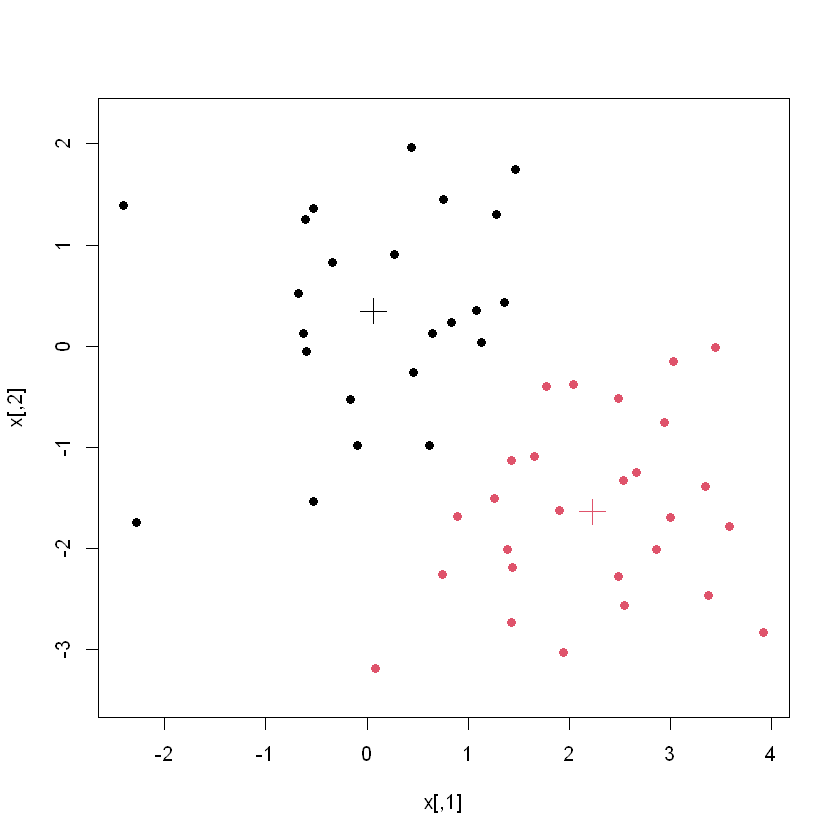

In [8]:
# run with two clusters:
km.out <- kmeans(x, centers = 2, nstart = 1)
km.out$cluster # a vector specifying which cluster
# each row (=observation) belongs to
names(km.out) # all the different elements of the kmeans output
km.out$totss # the sum of squares without clustering
km.out$tot.withinss # the sum of squares with this clustering
km.out$withinss # the sum of squares within each cluster
km.out$centers # matrix with the center coordinates
plot(x, col = km.out$cluster, pch = 16, asp = 1) # plot points coloured by cluster
points(km.out$centers, col=1:2, pch=3, cex = 2) # add the cluster centers

[1] 91.91395

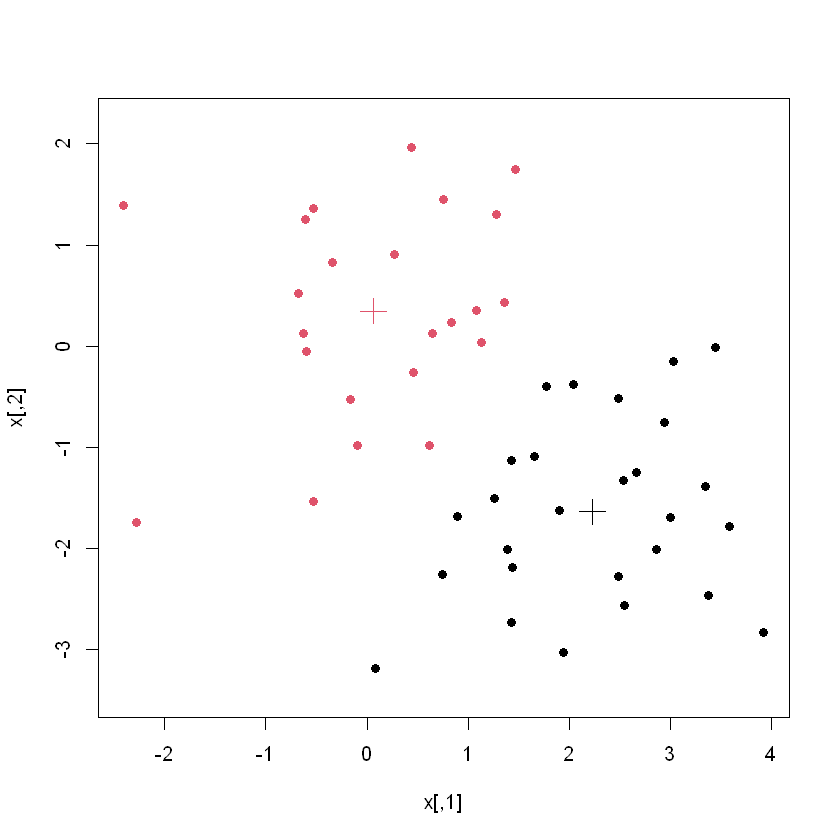

In [9]:
# clustering
km.out <- kmeans(x, centers = 2, nstart = 20)
# visualisation
plot(x, col = km.out$cluster, pch = 16, asp = 1)
points(km.out$centers, col=1:2, pch=3, cex = 2)
# stats
km.out$tot.withinss

[1] 68.27654

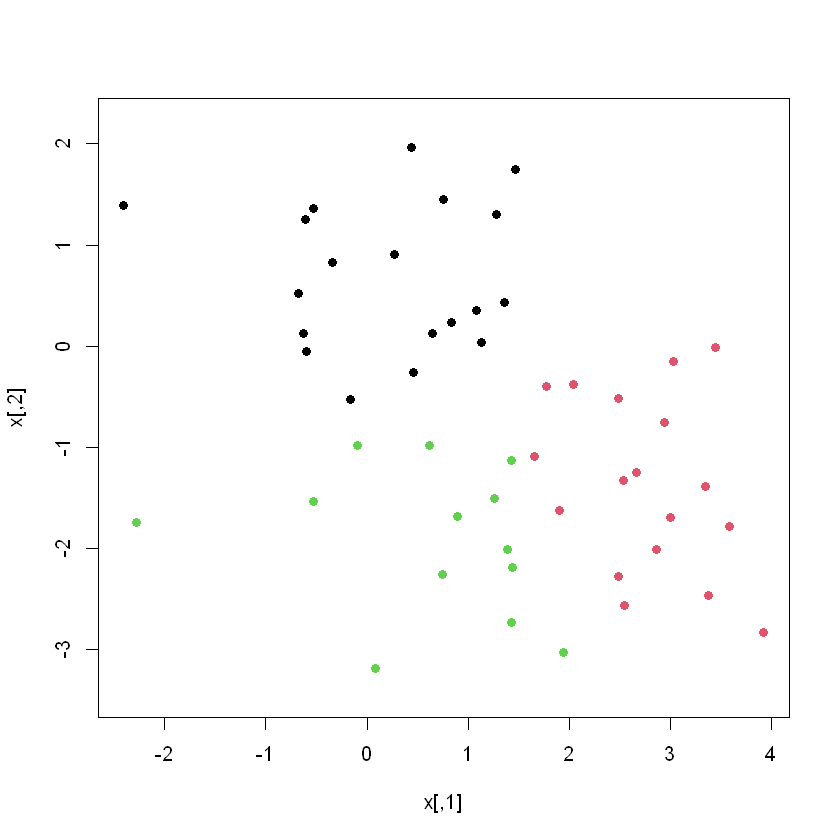

[1] 52.94398

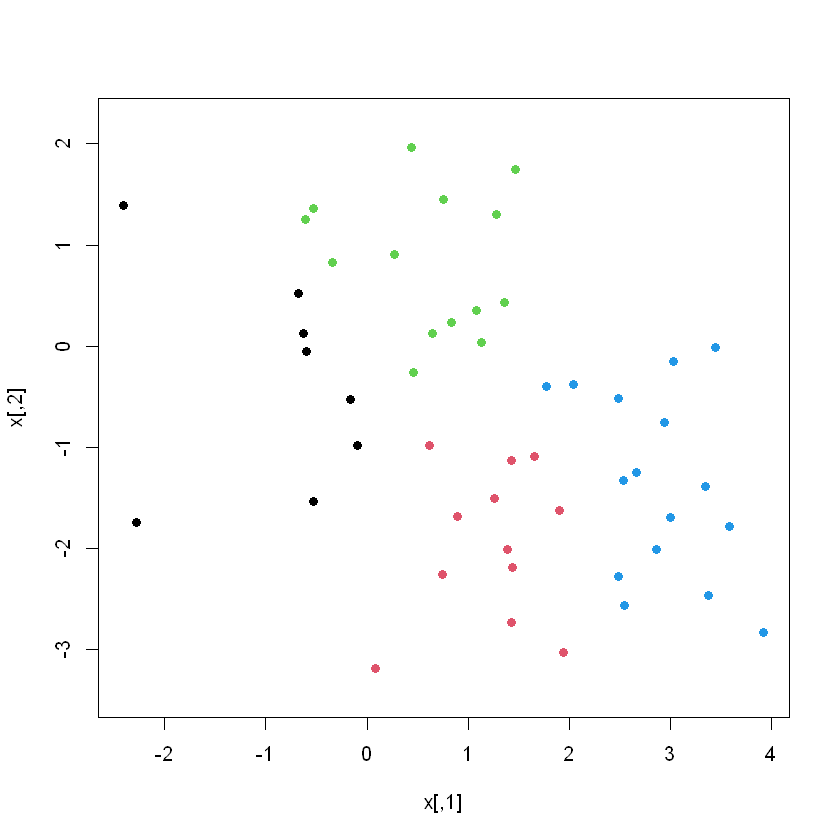

In [10]:
set.seed(4)
# 3 clusters
km.out <- kmeans(x, centers = 3, nstart = 20)
plot(x, col = km.out$cluster, pch = 16, asp = 1)
km.out$tot.withinss
# 4 clusters
km.out <- kmeans(x, centers = 4, nstart = 20)
plot(x, col = km.out$cluster, pch = 16, asp = 1)
km.out$tot.withinss

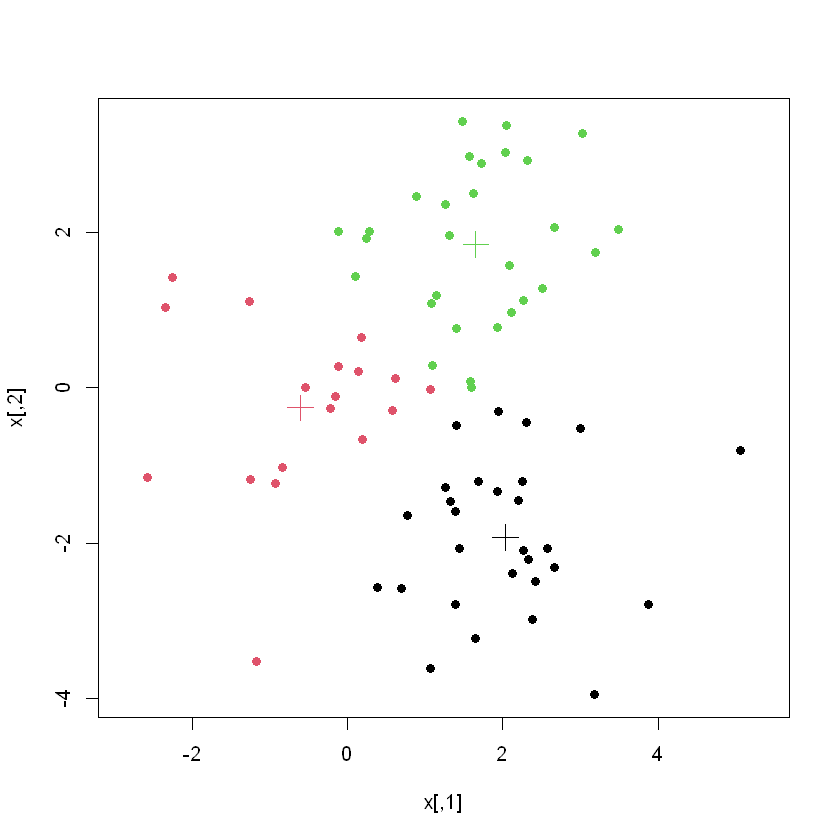

In [11]:
# data generation
x <- matrix(rnorm(50*3), ncol = 2)
x[1:25, 1] <- x[1:25, 1] + 2
x[1:25, 2] <- x[1:25, 2] - 2
x[50+1:25, 1] <- x[50 + 1:25, 1] + 2
x[50+1:25, 2] <- x[50 + 1:25, 2] + 2
# clustering
km.out <- kmeans(x, 3, nstart = 20)
# visualisation
plot(x, col = km.out$cluster, pch = 16, asp = 1)
points(km.out$centers, col = 1:3, pch = 3, cex = 2)

2.2

In [12]:
# load packages
library(dplyr) # we will use this for easier data handling
library(mdsr) # contains the data set we want to work with

In [13]:
data("world_cities")

In [14]:
# we learn about the data:
# - dimension (= rows x columns)
# - names and class of columns
# - example for the first observations
str(world_cities) # we see the dimension
# summary statistics
summary(world_cities)

tibble [4,428 × 9] (S3: tbl_df/tbl/data.frame)
 $ geoname_id       : num [1:4428] 291074 292223 292672 292932 292968 ...
 $ name             : chr [1:4428] "Ras Al Khaimah City" "Dubai" "Sharjah" "Ajman City" ...
 $ latitude         : num [1:4428] 25.8 25.1 25.3 25.4 24.5 ...
 $ longitude        : num [1:4428] 55.9 55.3 55.4 55.5 54.4 ...
 $ country          : chr [1:4428] "AE" "AE" "AE" "AE" ...
 $ country_region   : chr [1:4428] "05" "03" "06" "02" ...
 $ population       : num [1:4428] 351943 2956587 1324473 490035 603492 ...
 $ timezone         : chr [1:4428] "Asia/Dubai" "Asia/Dubai" "Asia/Dubai" "Asia/Dubai" ...
 $ modification_date: Date[1:4428], format: "2019-09-09" "2019-08-28" ...
 - attr(*, "problems")= tibble [1,001 × 5] (S3: tbl_df/tbl/data.frame)
  ..$ row     : int [1:1001] 1154 2694 2742 7567 7567 7608 7608 7650 7650 7652 ...
  ..$ col     : chr [1:1001] "admin3_code" "admin4_code" "admin4_code" "admin3_code" ...
  ..$ expected: chr [1:1001] "a double" "a double" "a dou

   geoname_id           name              latitude        longitude       
 Min.   :   14256   Length:4428        Min.   :-53.15   Min.   :-157.858  
 1st Qu.: 1264492   Class :character   1st Qu.: 12.82   1st Qu.:  -6.906  
 Median : 1857552   Mode  :character   Median : 30.42   Median :  34.519  
 Mean   : 2413575                      Mean   : 24.85   Mean   :  30.248  
 3rd Qu.: 3446636                      3rd Qu.: 40.61   3rd Qu.:  91.842  
 Max.   :12166273                      Max.   : 69.35   Max.   : 176.167  
   country          country_region       population         timezone        
 Length:4428        Length:4428        Min.   :  100015   Length:4428       
 Class :character   Class :character   1st Qu.:  132187   Class :character  
 Mode  :character   Mode  :character   Median :  197102   Mode  :character  
                                       Mean   :  459389                     
                                       3rd Qu.:  374936                     
             

In [15]:
big_cities <- world_cities %>%
filter(population >= 200000) %>%
select(longitude, latitude)


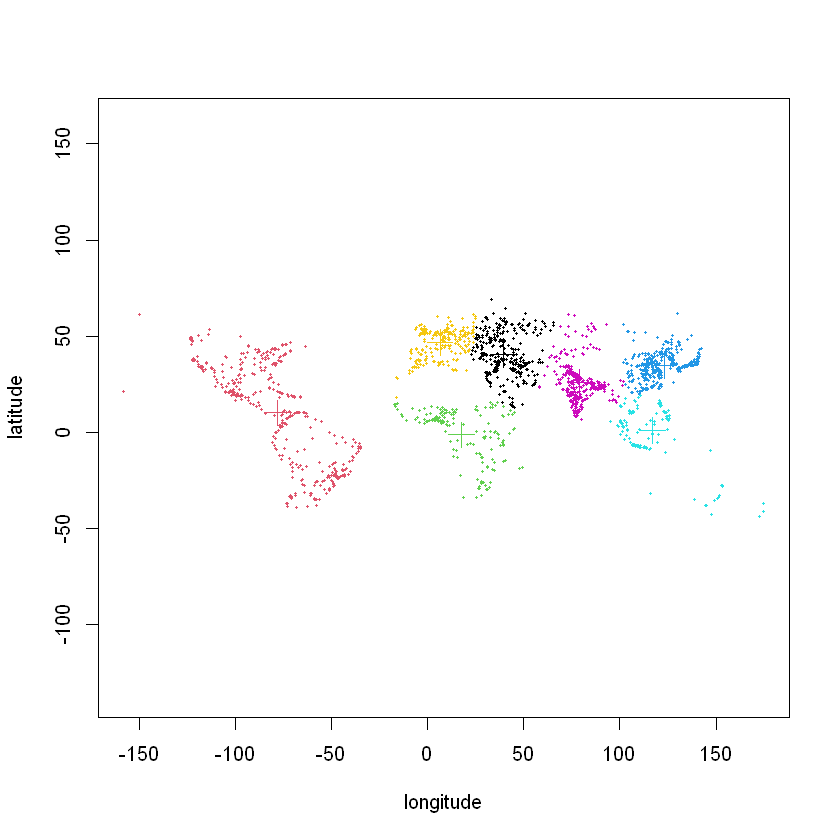

In [16]:
# clustering
cities_km <- kmeans(big_cities, centers = 7)
# visualisation
plot(big_cities, col = cities_km$cluster, pch = 16, asp = 1, cex = 0.3)
points(cities_km$centers, col = 1:7, pch = 3, cex = 2)

3 Written Exe